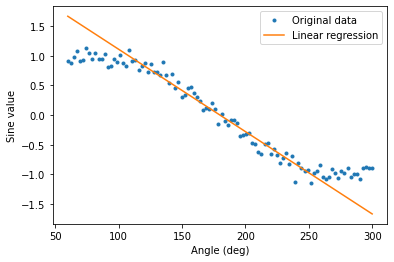

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

x = np.linspace(np.deg2rad(60), np.deg2rad(300), 100)

y = np.sin(x) + np.random.normal(0, 0.1, 100)

x_norm = (x - np.mean(x)) / np.std(x)
y_norm = (y - np.mean(y)) / np.std(y)

X = np.column_stack((np.ones(len(x_norm)), x_norm))

theta = np.zeros(2)

def compute_cost(X, y, theta):
    m = len(y)
    h = X @ theta
    J = (1/(2*m)) * np.sum((h - y)**2)
    return J

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        h = X @ theta
        theta = theta - (alpha/m) * X.T @ (h - y)
        J_history[i] = compute_cost(X, y, theta)
    return theta, J_history

alpha = 0.1
num_iters = 100

theta, J_history = gradient_descent(X, y_norm, theta, alpha, num_iters)

theta_denorm = np.array([np.mean(y) - np.mean(x)*theta[1]/np.std(x), theta[1]/np.std(x)])

plt.plot(np.rad2deg(x), y, '.', label='Original data')
plt.plot(np.rad2deg(x), X @ theta, '-', label='Linear regression')
plt.xlabel('Angle (deg)')
plt.ylabel('Sine value')
plt.legend()
plt.show()

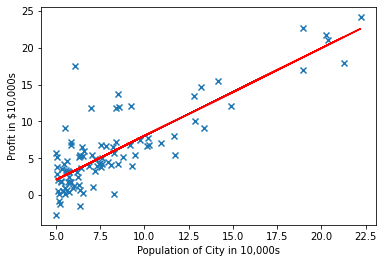

Mean Squared Error: 8.953942854813928


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('foodtruck.txt')

X = data['Population'].values
y = data['Profit'].values

X = (X - np.mean(X)) / np.std(X)

X = np.vstack((np.ones(len(X)), X)).T

theta = np.zeros(2)

alpha = 0.01
num_iters = 1000

def compute_cost(X, y, theta):
    m = len(y)
    J = 1 / (2 * m) * np.sum((np.dot(X, theta) - y) ** 2)
    return J

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    for i in range(num_iters):
        theta = theta - alpha / m * np.dot(X.T, np.dot(X, theta) - y)
        J_history.append(compute_cost(X, y, theta))
    return theta, J_history

theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

plt.scatter(data['Population'], data['Profit'], marker='x')
plt.plot(data['Population'], np.dot(X, theta), color='r')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

mse = np.mean((np.dot(X, theta) - y) ** 2)
print('Mean Squared Error:', mse)


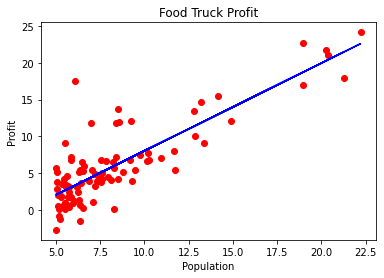

Mean Squared Error: 8.953942751950358


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('foodtruck.txt')
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, color='red')
plt.plot(X, y_pred, color='blue')
plt.title('Food Truck Profit')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

mse = mean_squared_error(y, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error:  8.317419497060477


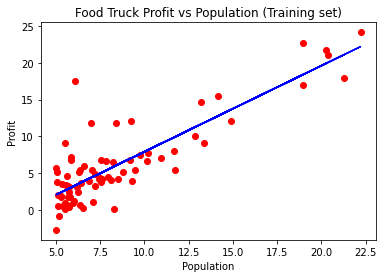

In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('foodtruck.txt')

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, ridge.predict(X_train), color='blue')
plt.title('Food Truck Profit vs Population (Training set)')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()
